## Confronto tra Heap Sort e Insertion Sort


Prima di partire con la trattazione teorica, includo preliminarmente tutte le librie utili al confronto dei due algoritmi di ordinamento 

In [58]:
import copy
import time
import matplotlib.pyplot as plt
import math
import random


### Insertion Sort
**Descizione**  
Insertion Sort è un algoritmo di ordinamento molto semplice, ordina sul posto ed è utilizzato principalmente quando si ha necessità di ordinare un numero ristretto di elementi.  

**Come funziona?**  

Dato un array di elementi da ordinare, Insertion Sort usa un approccio molto intuitivo per ricavare l'array ordinato:  
Partiziona l'array da ordinare in due sottoarray
- Elementi ordinati
- Elementi da ordinare  

Inizialmente, nel sottoarray degli elementi ordinati c'è solamente il primo elemento dell'array da ordinare (essendo da solo, è per costruzione nella giusta posizione), mentre ricadono nel sottoarray non ordinato tutti gli altri elementi da dover ordinare.
Viene poi preso ogni elemento dell'array da ordinare e confrontato con tutti i valori presenti nell'array ordinato fino a quando non si trova la posizione corretta per rispettare l'ordinamento. Si esegue questo procedimento per tutti i gli elementi presenti nel sottoarray da ordinare.  

**Codice Insertion Sort**

In [59]:
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr

**Cenni sull'analisi teorica delle prestazioni**

**Supposizione iniziale:**  
Sia n il numero di elementi dell'array da ordinare.

**Caso ottimo**  
Il caso ottimo per Insertion Sort è quando gli viene passato un array già ordinato, in quanto, non dovendo fare nessuno scambio tra elementi per garantire l'ordinamento globale, tutti valori dell'array vengono visitati solamente una volta, ottenndo così una complessità lineare.

**Caso pessimo**
Il caso pessimo per Insertion Sort si ha quando gli viene passato un array ordinato al contrario: in questo caso, si avranno il numero massimo di confronti possibili, ottenendo una complessità quadratica pari a $\theta(n^2)$.  

**Caso medio**  
Si supponga adesso di passare ad Insertion Sort un array con la metà degli elementi ordinati e metà non ordinati. 
Intuitivamente, dovremo ordinare la metà degli elementi dell'array: questo porta sempre ad avere una complessità di tipo quadratico:$\theta(n^2)$



### Heap Sort
**Descizione**  
Heap Sort è un algoritmo di ordinamento sul posto particolarmente efficiente: garantisce un tempo di esecuzione pari a $O(n*log(n))$.  
**Heap**  
L'algoritmo prende il nome dalla struttura dati su cui si basa: l'heap. Solitamente viene memorizzato nel calcolatore usando un array ma, almeno a livello didattico, risulta più intuitivo visualizzarlo come albero binario quasi completo. L'heap è una struttura dati molto versatile ed usata in vari ambiti dell'informatica: uno tra tutti è la possibilità di implementare in maniera molto semplice code di priorità, usata, ad esempio, in alcune politche di scheduling dei processi da parte del kernel dei sistemi operativi.  
Esistono due tipi di heap:  
- *max-heap* 
- *min-heap*.    

**In questa trattazione useremo il *max-heap***.  
 Tenendo a mente la rappresentazione di un heap tramite albero binario, si definisce max-heap un heap dove *ogni nodo ha un valore maggiore o uguale a quello dei suoi figli*.
 **Definizione:** In un max-heap, la radice dell'albero è l'elemento più grande di tutto l'array. 

La funzione che conserva la proprietà del *max-heap* si chiama **max-heapify** ed ha una complessità pari a $O(log(n))$.  
**Pseudocodice Heapify:**  

In [60]:
def maxHeapify(arr, length, i):
    largest = i          
    l = 2 * i + 1    #figlio sinistro  
    r = 2 * i + 2    #figlio destro

    if l < length and arr[i] < arr[l]:
        largest = l
    
    if r < length and arr[largest] < arr[r]:
        largest = r

    if largest != i: #se qui dentro, la property heap è violata e chiamo ricorsivamente heapify
        arr[i], arr[largest] = arr[largest], arr[i]
        maxHeapify(arr, length, largest)

**Costruire un max-heap**  
Dato un array di elementi, per renderlo un max-heap bisogna eseguire il seguente algoritmo:  
- Dividere l'array in due ed ottenere la prima metà (la seconda metà, nella rappresentazione come albero binario, sono foglie, e quindi non hanno figli).
- Per ogni elemento appartenente alla prima metà dell'array ottenuta, chiamare la funzione max-heapify  

In [61]:
def buildMaxHeap(arr, length):
    for i in range(length // 2, -1, -1):
        maxHeapify(arr, length, i)

**Heap Sort**  
L'heap sort non fa altro che eseguire questo algoritmo:  
- Partendo dall'array da ordinare, usa la funzione buildMaxHeap per renderlo un max-heap
- Iterativamente prende la radice dell' max-heap (per costruzione il valore più grande tra quelli da ordinare), la scambia con l'ultimo elemento dell'heap, diminuisce la dimensione dell'heap di uno e verifica di avere ancora una struttura dati che preserva la proprietà fondamentale dei max-heap usando maxHeapify.
Continua ad andare avanti fino a quando a quando non arriva ad avere un heap con un solo valore.  

**Analisi complessità**  
Complessità maxHeapify: $O(log(n))$
Heap Sort chiama maxHeapify n volte, quindi si avrà una complessità totale pari a $n * O(log(n)) = O(n*log(n)) $ 



In [62]:
def heap_sort(arr):
    n = len(arr)

    buildMaxHeap(arr, n)

    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]  
        maxHeapify(arr, i, 0) 

    return arr


Per confrontare al meglio i due algoritmi, mi servirò di alcune funzioni ausliare:
- generateUnorderedDataset è una funzione che, dato in input un numero n di valori, un limite superiore ed un limite inferiori di valori da poter generare restituisce un array riempito con n valori generati in maniera casuale e compresi tra i limiti specificati
- testAlgorithm è una funzione che, dato un algoritmo di ordinamento e un array di valori da ordinare, esegue l'algoritmo di ordinamento sull'array misurando il suo tempo di esecuzione e lo restituisce
- testAlgorithms è una funzione di appoggio che usa testAlgorithm per testare Insertion Sort ed Heap Sort su un dataset fornito in input e restituisce poi i tempi di esecuzione.

In [63]:
def generateUnorderdDataset(n, minValue, maxValue):
    dataset = []
    for _ in range(n):
        dataset.append(random.randint(minValue, maxValue))
    random.shuffle(dataset)
    return dataset

def testAlgorithm(algorithm, dataset):
    start = time.time()
    algorithm(copy.deepcopy(dataset))
    end = time.time()
    return (end - start)

def testAlgorithms(dataset):
    insertionSortTime = testAlgorithm(insertion_sort, dataset)
    heapSortTime = testAlgorithm(heap_sort, dataset)
    return insertionSortTime, heapSortTime

Dedichiamoci adesso a programmare le funzioni per testare gli algoritmi con un numero variabile e crescente di elementi da ordinare e per vedere i risultati

In [64]:

def runTests(config):
    base = config['base']
    minExp = config['minExp']
    maxExp = config['maxExp']
    results = {
        'xValues': [],
        'insertionSortTimes': [],
        'heapSortTimes': []
    }
    for i in range(minExp, maxExp):
        n = (int)(math.pow(base, i))
        dataset = generateUnorderdDataset(n, config['minValue'], config['maxValue'])
        insertionSortTime, heapSortTime = testAlgorithms(dataset)
        results['xValues'].append(n)
        results['insertionSortTimes'].append(insertionSortTime)
        results['heapSortTimes'].append(heapSortTime)
    return results

def plotTests(results):
    plt.plot(results['xValues'], results['insertionSortTimes'], label='Insertion Sort')
    plt.plot(results['xValues'], results['heapSortTimes'], label='Heap Sort')
    plt.xlabel('Numero elementi')
    plt.ylabel('Tempo')
    plt.title('Insertion Sort vs Heap Sort')
    plt.legend()
    plt.show()
    

Usiamo le funzioni non appena definite

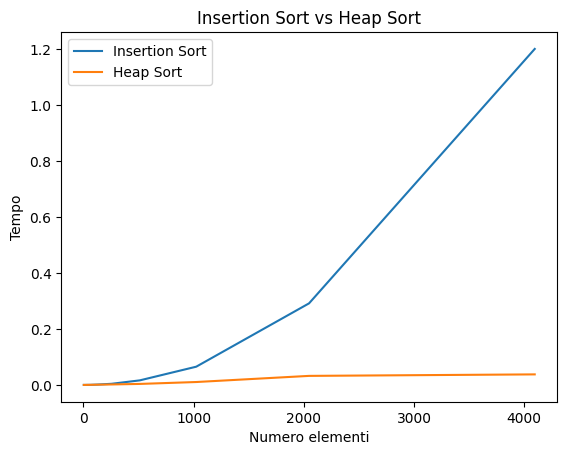

In [65]:
config = {
    'base': 2,
    'minExp': 2,
    'maxExp': 13,
    'minValue' : -1000,
    'maxValue' : 1000
}
results = runTests(config)
plotTests(results)

## Analisi dei risultati ottenuti

Come si può dedurre dai risultati sperimentali ottenuti, Heap Sort, garantendo un tempo di esecuzione pari ad $O(n*log(n))$, all'aumentare dei valori di ordinare presenta circa sempre le stesse prestazioni. I risultati sperimentali sull'esecuzione di Insertion Sort, invece, confermano la complessità teorica di $\Theta(n^2)$.
Limitarsi però al mero confronto sulle prestazioni non permette di fornire un contesto completo sul confronto dei due algoritmi:
Heap Sort, ad un primo sguardo, sembrerebbe una soluzione da preferire in maniera totale rispetto ad Insertion Sort, e questo risulta veritiero se, l'unico parametro di interesse è il tempo di esecuzione.   

Insertion Sort, però, presenta un implementazione molto più semplice, risulta altrettanto valido a Heap Sort quando c'è necessità di ordinare numeri ridotti di elementi e, aspetto fondamentale, a differenza di Heap Sort **Insertion Sort** mantiene l'ordine relativo di elementi uguali, ovvero è un **algoritmo stabile**.
  
Credo sia quindi errato non prendere in considerazione Insertion Sort ed usare solamente Heap Sort: ogni problema di ordinamento è diverso e, a seconda dei parametri di interesse, può risultare più adatta l'implementazione di uno piuttosto che dell'altro.